In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('data.csv')
df.head()

,Year,Male No.,Male %,Female No.,Female %,Total
0,1986,11023,76.25,3433,23.75,14456
1,1987,10647,75.37,3480,24.63,14127
2,1988,8309,45.09,10119,54.91,18428
3,1989,8680,35.11,16044,64.89,24724
4,1990,15377,36.08,27248,63.92,42625


# Preprocessing

## Check for missing values

In [7]:
missing_values = df.isnull().sum()
print("Missing Values:\n",missing_values)

Missing Values:
 Year            0
Male No.        0
Male %          0
 Female No.     0
Female %        0
 Total          0
dtype: int64


## Check for duplicate rows

In [8]:
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:",duplicate_rows)

Duplicate Rows: 0


## Convert percentages to decimals

In [9]:
df['Male %'] /= 100
df['Female %'] /= 100
print("\nData after preprocessing:")
print(df)


Data after preprocessing:
    Year  Male No.   Male %   Female No.   Female %   Total 
0   1986      11023  0.7625          3433    0.2375    14456
1   1987      10647  0.7537          3480    0.2463    14127
2   1988       8309  0.4509         10119    0.5491    18428
3   1989       8680  0.3511         16044    0.6489    24724
4   1990      15377  0.3608         27248    0.6392    42625
5   1991      21423  0.3297         43560    0.6703    64983
6   1992      34858  0.2800         89636    0.7200   124494
7   1993      32269  0.2500         96807    0.7500   129076
8   1994      16377  0.2722         43791    0.7278    60168
9   1995      46021  0.2668        126468    0.7332   172489
10  1996      43112  0.2652        119464    0.7348   162576
11  1997      37552  0.2499        112731    0.7501   150283
12  1998      53867  0.3371        105949    0.6629   159816
13  1999      63720  0.3545        116015    0.6455   179735
14  2000      59793  0.3282        122395    0.6718   1821

# Descriptive Analysis

In [10]:
  summary_stats = df.describe()

print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
               Year      Male No.      Male %    Female No.    Female %  \
count    27.000000      27.000000  27.000000      27.000000  27.000000   
mean   1999.000000   62987.407407   0.402785   95332.000000   0.597215   
std       7.937254   43565.988038   0.134053   46916.639267   0.134053   
min    1986.000000    8309.000000   0.249900    3433.000000   0.237500   
25%    1992.500000   26846.000000   0.326600   66713.500000   0.521600   
50%    1999.000000   59793.000000   0.355100  116015.000000   0.644900   
75%    2005.500000   92033.000000   0.478400  127199.500000   0.673400   
max    2012.000000  143784.000000   0.762500  138547.000000   0.750100   

              Total   
count      27.000000  
mean   158319.407407  
std     85031.529601  
min     14127.000000  
25%     94738.500000  
50%    179735.000000  
75%    216584.000000  
max    282331.000000  


In [11]:
# Correlation analysis
correlation_matrix = df.corr()

print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                   Year  Male No.     Male %   Female No.   Female %    Total 
Year          1.000000   0.973463  0.062955      0.833484 -0.062955  0.958634
Male No.      0.973463   1.000000  0.209701      0.765959 -0.209701  0.934973
Male %        0.062955   0.209701  1.000000     -0.323248 -1.000000 -0.070913
 Female No.   0.833484   0.765959 -0.323248      1.000000  0.323248  0.944196
Female %     -0.062955  -0.209701 -1.000000      0.323248  1.000000  0.070913
 Total        0.958634   0.934973 -0.070913      0.944196  0.070913  1.000000


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare data for modeling
X = df[['Year']]  # Reshaping to a 2D array
y = df[' Total ']   # No spaces in column name

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict Total for future years
future_years = np.array([[year] for year in range(1991, 2021)])  # Reshaping to a 2D array
predicted_total = model.predict(future_years)

print("\nPredicted Total for Future Years:\n", predicted_total)



Predicted Total for Future Years:
 [ 76160.91168091  86430.72364672  96700.53561253 106970.34757835
 117240.15954416 127509.97150997 137779.78347578 148049.59544159
 158319.40740741 168589.21937322 178859.03133903 189128.84330484
 199398.65527065 209668.46723647 219938.27920228 230208.09116809
 240477.9031339  250747.71509971 261017.52706553 271287.33903134
 281557.15099715 291826.96296296 302096.77492877 312366.58689459
 322636.3988604  332906.21082621 343176.02279202 353445.83475783
 363715.64672365 373985.45868946]


D:\Softwares\Anaconda-3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


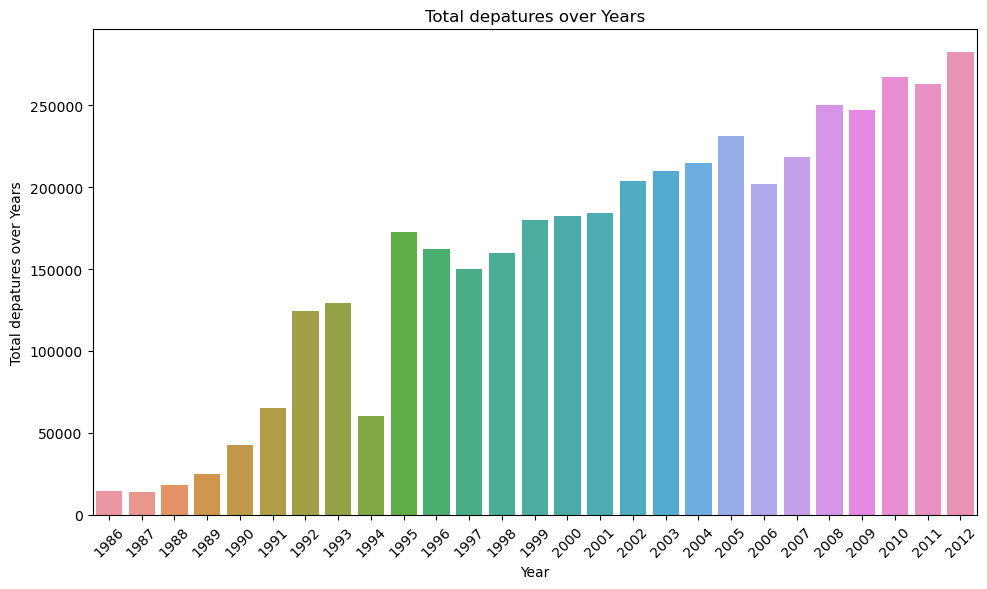

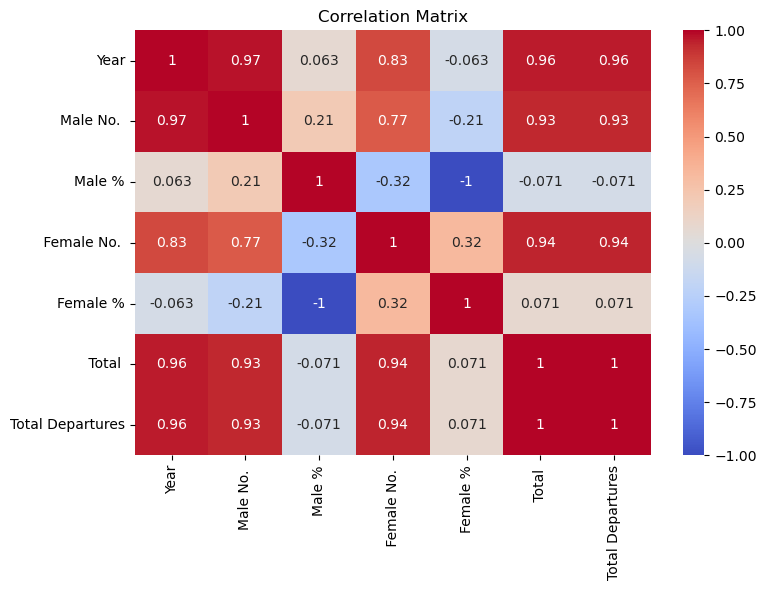

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Descriptive Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y=' Total ', data=df)
plt.title('Total depatures over Years')
plt.xlabel('Year')
plt.ylabel('Total depatures over Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('descriptive_analysis.png')

# Step 2: Diagnostic Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('diagnostic_analysis.png')

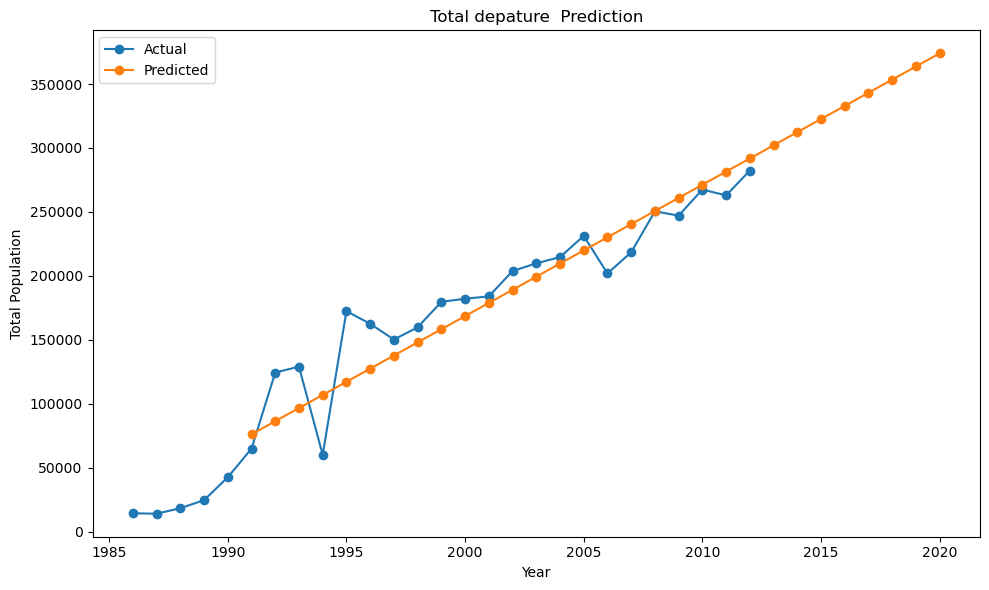

In [50]:
# Step 3: Predictive Analysis
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df[' Total '], 'o-', label='Actual')
plt.plot(range(1991, 2021), predicted_total, 'o-', label='Predicted')
plt.title('Total depature  Prediction')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend()
plt.tight_layout()
plt.savefig('predictive_analysis.png')

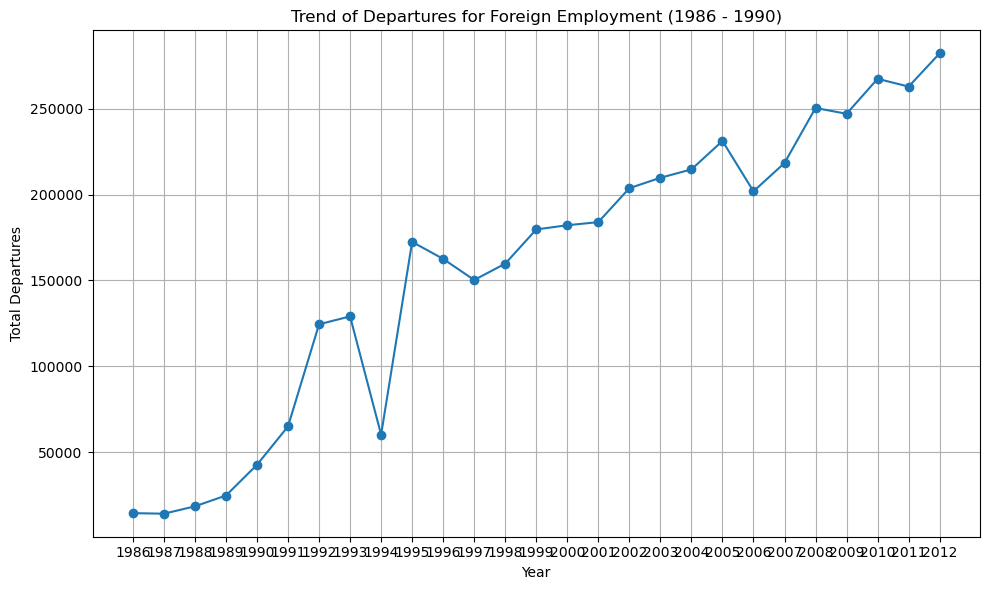

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df[' Total '], marker='o', linestyle='-')
plt.title('Trend of Departures for Foreign Employment (1986 - 1990)')
plt.xlabel('Year')
plt.ylabel('Total Departures')
plt.grid(True)
plt.xticks(df['Year'])
plt.tight_layout()
plt.show()

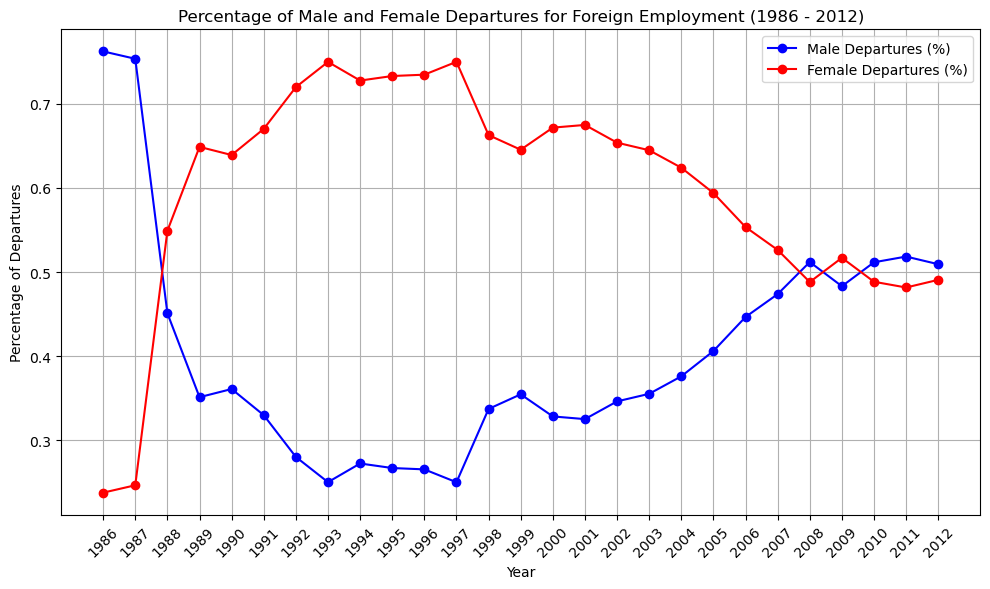

In [25]:
# Extract data from the DataFrame
years = df['Year']
male_percentages = df['Male %']
female_percentages = df['Female %']

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(years, male_percentages, marker='o', linestyle='-', color='blue', label='Male Departures (%)')
plt.plot(years, female_percentages, marker='o', linestyle='-', color='red', label='Female Departures (%)')
plt.title('Percentage of Male and Female Departures for Foreign Employment (1986 - 2012)')
plt.xlabel('Year')
plt.ylabel('Percentage of Departures')
plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
# Calculate total male and female departures across all years
total_male = df['Male %'].sum()
total_female = df['Female %'].sum()

# Calculate the overall percentage
overall_male_percentage = (total_male / (total_male + total_female)) * 100
overall_female_percentage = (total_female / (total_male + total_female)) * 100

print(f"Overall Male Percentage: {overall_male_percentage:.2f}%")
print(f"Overall Female Percentage: {overall_female_percentage:.2f}%")

Overall Male Percentage: 40.28%
Overall Female Percentage: 59.72%


In [35]:
# Calculate total departures for each year
df['Total Departures'] = df['Male No. '] + df[' Female No. ']

# Find the year with the highest total departures
most_departures_year = df.loc[df['Total Departures'].idxmax(), 'Year']

print("Year with the Most Total Departures:", most_departures_year)


Year with the Most Total Departures: 2012


In [33]:
print(df.columns)

Index(['Year', 'Male No. ', 'Male %', ' Female No. ', 'Female %', ' Total '], dtype='object')


In [36]:
# Calculate total male and female departures for all years
total_male_departures = df['Male No. '].sum()
total_female_departures = df[' Female No. '].sum()

print("Total Male Departures:", total_male_departures)
print("Total Female Departures:", total_female_departures)

Total Male Departures: 1700660
Total Female Departures: 2573964


In [43]:
# Find the row corresponding to 2012
row_2012 = df[df['Year'] == 2012]

# Get the total departures in 2012
total_departures_2012 = row_2012[' Total '].iloc[0]

# Calculate the total departures across all years
total_departures_all_years = df[' Total '].sum()

# Calculate the percentage of total departures in 2012
percentage_2012 = (total_departures_2012 / total_departures_all_years) * 100

print("Percentage of total departures in 2012:", percentage_2012)

Percentage of total departures in 2012: 6.60481483283676


In [48]:
# Find the year with the most female departures
most_female_departures_year = df.loc[df[' Female No. '].idxmin(), 'Year']

print("Year with the lowest female departures:", most_female_departures_year)

Year with the lowest female departures: 1986
